## Digit Identifiying Neural Network ##


In [42]:
import numpy as np
import seaborn as sns

import keras
from keras.datasets import mnist, fashion_mnist
from keras.layers import Dense, Flatten, Dropout, MaxPooling2D
from keras.layers.convolutional import Conv2D
from keras.models import Sequential, load_model
from matplotlib import pyplot as plt

from sklearn.metrics import confusion_matrix

Visualization of Data (examples)

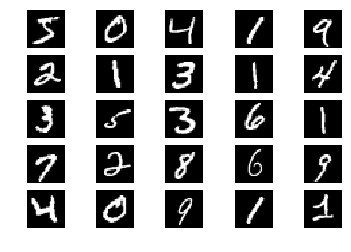

In [33]:
(X_TRAIN, Y_TRAIN), (X_TEST, Y_TEST) = mnist.load_data()

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_TRAIN[i], cmap=plt.get_cmap('gray'))
    plt.axis('off')

In [34]:
def sigmoid(x):
    """ sigmoid function for normalization """
    return 1 / (1 + np.exp(-x))

def prep(x, y):
    """ data preperation from integer array to 4D shaped_array """
    out_y = keras.utils.to_categorical(y, 10)

    shaped_array = x.reshape(-1, 28, 28, 1)
    preped_x = sigmoid(shaped_array)
    return preped_x, out_y

X_T_PREP, Y_T_PREP = prep(X_TRAIN, Y_TRAIN)

X_TEST_PREP, Y_TEST_PREP = prep(X_TEST, Y_TEST)

/home/kat/anaconda3/envs/deepl/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


### Building the Neural Network ###

In [35]:
M = Sequential()
M.add(Conv2D(100, kernel_size=(3, 3),
             activation='relu',
             data_format='channels_last',
             input_shape=(28, 28, 1)))
M.add(Conv2D(20, kernel_size=(3, 3),
             activation='relu',
             data_format='channels_last'))

M.add(Flatten())
M.add(Dense(50, activation='relu'))
M.add(Dense(10, activation='softmax'))
M.compile(loss='categorical_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])
M.fit(X_T_PREP, Y_T_PREP, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 398s 7ms/step - loss: 0.2075 - acc: 0.9364
Epoch 2/10
60000/60000 [==============================] - 394s 7ms/step - loss: 0.0767 - acc: 0.9770
Epoch 3/10
60000/60000 [==============================] - 387s 6ms/step - loss: 0.0546 - acc: 0.9826
Epoch 4/10
60000/60000 [==============================] - 385s 6ms/step - loss: 0.0392 - acc: 0.9879
Epoch 5/10
60000/60000 [==============================] - 385s 6ms/step - loss: 0.0284 - acc: 0.9908
Epoch 6/10
60000/60000 [==============================] - 385s 6ms/step - loss: 0.0198 - acc: 0.9938
Epoch 7/10
60000/60000 [==============================] - 385s 6ms/step - loss: 0.0165 - acc: 0.9946
Epoch 8/10
60000/60000 [==============================] - 387s 6ms/step - loss: 0.0133 - acc: 0.9956
Epoch 9/10
60000/60000 [==============================] - 384s 6ms/step - loss: 0.0092 - acc: 0.9969
Epoch 10/10
60000/60000 [==============================] - 387s 6ms/step - loss: 0.0100 - a

In [38]:
M.save_weights(filepath='/home/kat/Documents/ProjectsSPICED/Week7/MNIST/MNIST/M_model.h5py')
M.save('m-model.h5')

In [43]:
M = load_model('m-model.h5')

In [44]:
M.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 26, 26, 100)       1000      
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 24, 24, 20)        18020     
_________________________________________________________________
flatten_6 (Flatten)          (None, 11520)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 50)                576050    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                510       
Total params: 595,580
Trainable params: 595,580
Non-trainable params: 0
_________________________________________________________________


In [139]:
# model.evaluate(x=xte, y=yte)

10000/10000 [==============================] - 21s 2ms/step


[0.0872821976552932, 0.9814]

In [45]:
Y_PRED = M.predict_classes(X_TEST_PREP)

### Confusion Matrix ###

Visualizing Accuracy per digit

In [46]:
confusion_matrix(Y_TEST, Y_PRED)

array([[ 975,    0,    1,    0,    1,    0,    1,    1,    1,    0],
       [   0, 1124,    0,    3,    2,    1,    3,    1,    1,    0],
       [   3,    1, 1008,    5,    4,    0,    0,    8,    3,    0],
       [   0,    0,    3,  993,    0,    5,    0,    4,    4,    1],
       [   3,    0,    0,    0,  959,    0,    0,    0,    2,   18],
       [   5,    1,    0,   16,    0,  865,    1,    1,    2,    1],
       [  13,    3,    2,    1,    7,    6,  925,    0,    1,    0],
       [   1,    0,    5,    3,    0,    0,    0, 1015,    1,    3],
       [   9,    0,    3,    7,    2,    1,    0,    2,  945,    5],
       [   3,    4,    0,    3,    3,    1,    0,    4,    2,  989]])

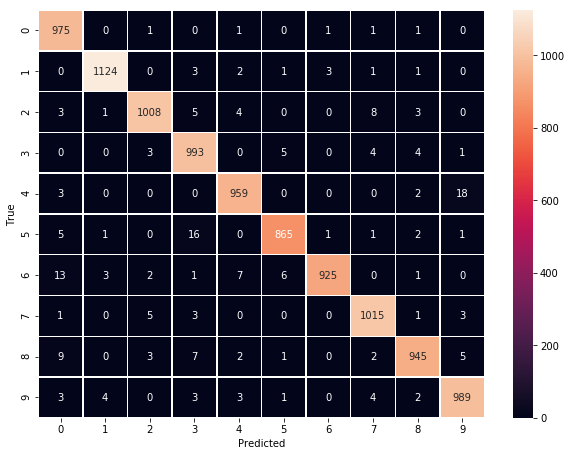

In [48]:
plt.figure(figsize=[10.0, 7.5])
sns.heatmap(confusion_matrix(Y_TEST, Y_PRED), annot=True, fmt="d", linewidths=.5)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# FASHION-MNIST #

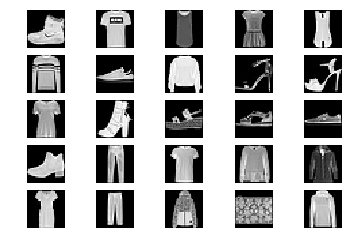

In [4]:
(X_TRAIN_FASH, Y_TRAIN_FASH), (X_TEST_FASH, Y_TRUE_FASH) = fashion_mnist.load_data()

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_TRAIN_FASH[i], cmap=plt.get_cmap('gray'))
    plt.axis('off')

In [8]:
X_P, Y_P = prep(X_TRAIN_FASH, Y_TRAIN_FASH)
X_TEST_P, Y_TEST_P = prep(X_TEST_FASH, Y_TRUE_FASH)

/home/kat/anaconda3/envs/deepl/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
F = Sequential()
F.add(Conv2D(100, 
              activation='relu',
              kernel_size=(3, 3),
              input_shape=(28, 28, 1),
              data_format='channels_last'))
F.add(Dropout(0.2))
F.add(Conv2D(50, activation='relu',
             kernel_size=(3, 3),
             data_format='channels_last'))
F.add(MaxPooling2D(pool_size=(3, 3),
                   padding='valid',
                   data_format='channels_last'))
F.add(Conv2D(30, activation='relu',
             kernel_size=(3, 3),
             data_format='channels_last'))
F.add(Flatten())
F.add(Dense(128, activation='sigmoid'))
F.add(Dense(10, activation='softmax'))

F.compile(loss='categorical_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])
F.fit(X_P, Y_P, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 639s 11ms/step - loss: 0.4907 - acc: 0.8185
Epoch 2/10
60000/60000 [==============================] - 648s 11ms/step - loss: 0.3391 - acc: 0.8712
Epoch 3/10
60000/60000 [==============================] - 635s 11ms/step - loss: 0.2990 - acc: 0.8871
Epoch 4/10
60000/60000 [==============================] - 630s 11ms/step - loss: 0.2732 - acc: 0.8952
Epoch 5/10
60000/60000 [==============================] - 628s 10ms/step - loss: 0.2526 - acc: 0.9038
Epoch 6/10
60000/60000 [==============================] - 628s 10ms/step - loss: 0.2357 - acc: 0.9097
Epoch 7/10
60000/60000 [==============================] - 634s 11ms/step - loss: 0.2201 - acc: 0.9156
Epoch 8/10
60000/60000 [==============================] - 640s 11ms/step - loss: 0.2046 - acc: 0.9227
Epoch 9/10
60000/60000 [==============================] - 629s 10ms/step - loss: 0.1908 - acc: 0.9275
Epoch 10/10
60000/60000 [==============================] - 630s 11ms/step - loss: 

In [49]:
F.save_weights(filepath='/home/kat/Documents/ProjectsSPICED/Week7/MNIST/MNIST/F_model.h5py')
F.save('f-model.h5')

In [50]:
F = load_model('f-model.h5')

In [55]:
Y_PRED_FASH = F.predict_classes(X_TEST_P)

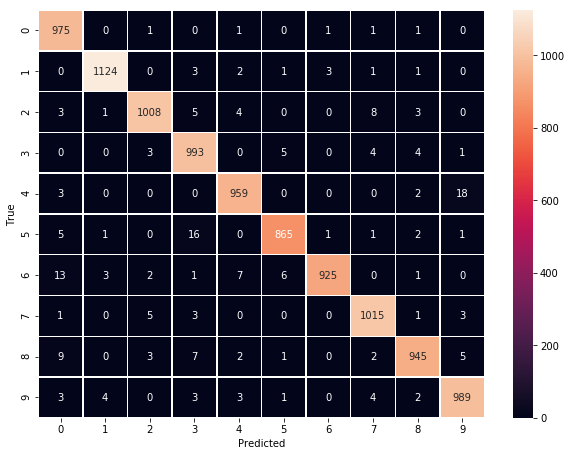

In [58]:
plt.figure(figsize=[10.0, 7.5])
sns.heatmap(confusion_matrix(Y_TEST, Y_PRED), annot=True, fmt="d", linewidths=.5)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()